In [26]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [27]:
def plot_histogram(cifar_conf_vals, noncifar_conf_vals, dataset):
    fig, axs = plt.subplots(1, 2, constrained_layout=True)

    mu, std = norm.fit(cifar_conf_vals)
    axs[0].hist(cifar_conf_vals, bins=100)
    axs[0].set_title('P1: $\mu=%.2f, \sigma=%.2f$ \ncount=%d' % (mu, std, len(cifar_conf_vals)))
    axs[0].set_xlabel('Confidence')
    axs[0].set_ylabel('Number of examples')

    mu, std = norm.fit(noncifar_conf_vals)
    axs[1].hist(noncifar_conf_vals, bins=100)
    axs[1].set_title('Non-CIFAR: $\mu=%.2f, \sigma=%.2f$ \ncount=%d' % (mu, std, len(noncifar_conf_vals)))
    axs[1].set_xlabel('Confidence')
    axs[1].set_ylabel('Number of examples')

    fig.suptitle('Histogram for {} Dataset confidence distribution for R subset'.format(dataset), fontsize=14)
    
    plt.show()
    # plt.savefig('{}_hist.png'.format(dataset))


In [28]:
def plot_W_histogram():
    import matplotlib.pyplot as plt

    df = pd.read_csv('cifar10-vs-ti/tinyimages.csv')

    # print(df)

    confs, is_c10 = df.iloc[:, 2:13], df.iloc[:, -2]
    # print(confs.shape)
    # print(confs)

    any_more_8 = confs.iloc[:, :-1].max(axis=1) > .8
    conf_more_8 = confs[any_more_8]

    p1_confs = conf_more_8.iloc[:, :-1].max(axis=1)
    last_confs = conf_more_8.iloc[:, -1]

    plot_histogram(p1_confs, last_confs, 'tinyimages')



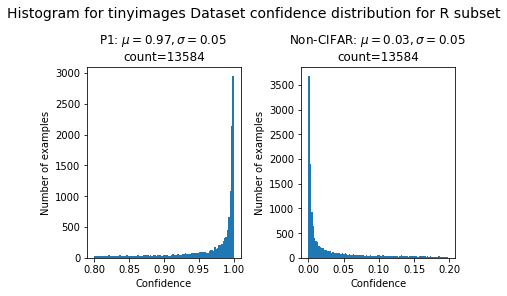

In [29]:
plot_W_histogram()